# Boosting(Ada Gradient XGBoosting)

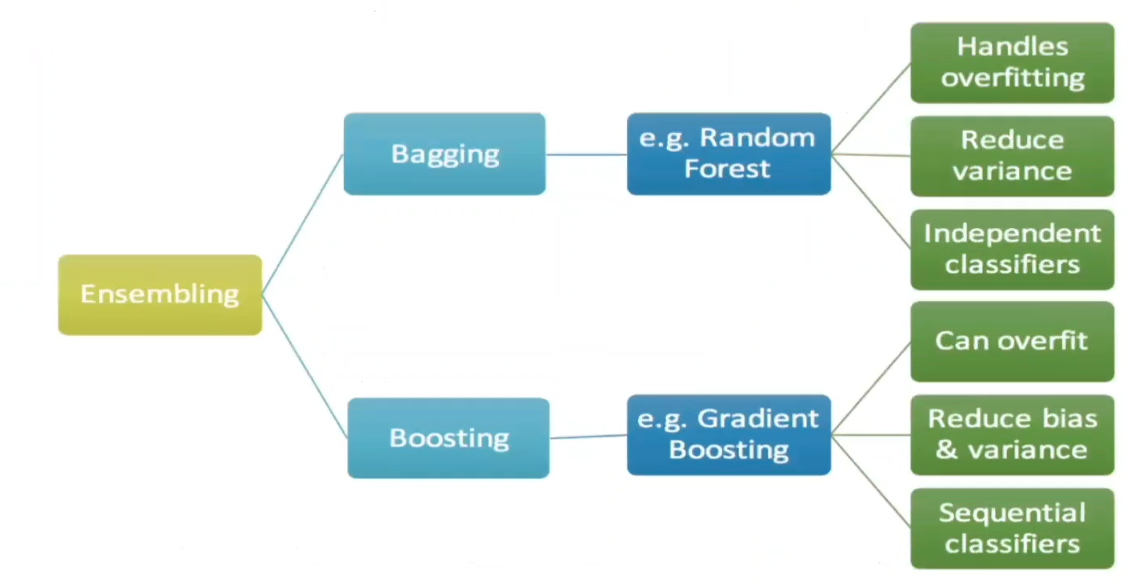

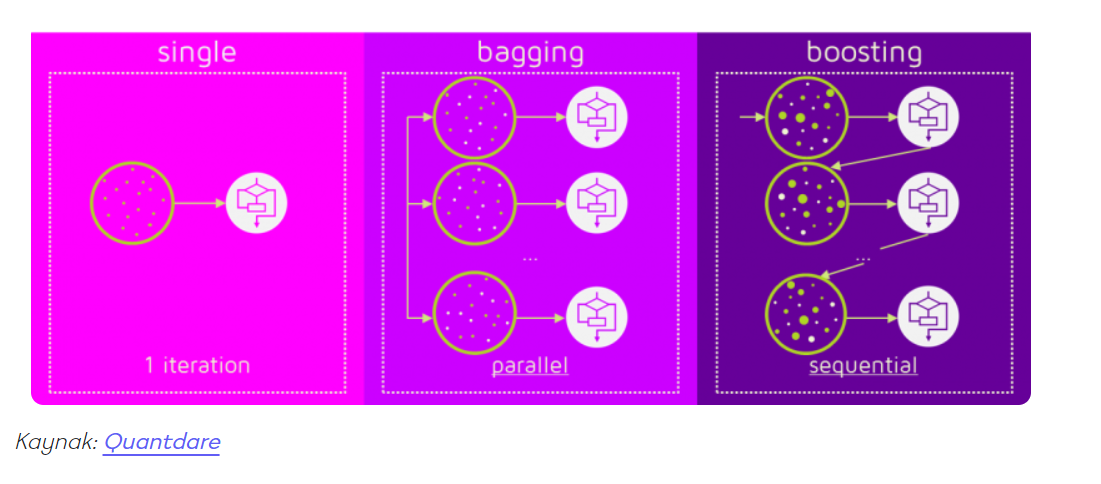

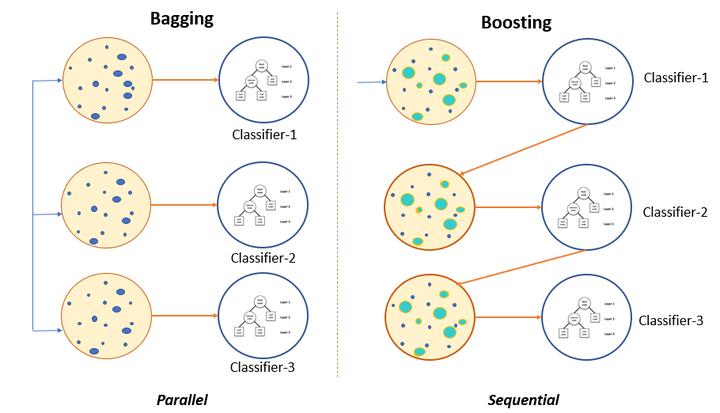

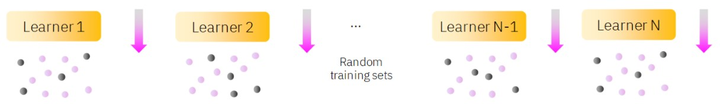

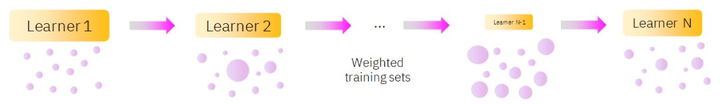

# AdaBoost (Adaptive Boosting)

Ensemble yöntemleri, bir grup temel öğreniciyi bir araya getirerek daha güçlü bir model oluşturan tekniklerdir. Outlier'lar (aykırı değerler), veri setinde genellikle diğer gözlemlerden önemli ölçüde farklı olan nadir veri noktalarını ifade eder. Ensemble yöntemlerinin outlier'lar üzerindeki etkisi, kullanılan öğrenici türüne ve ensemble yönteminin özelliklerine bağlı olarak değişebilir. İşte bazı genel gözlemler:

Rastgele Ormanlar:

Rastgele ormanlar outlier'ları genellikle daha iyi tolere eder. Çünkü her bir ağaç farklı bir alt küme üzerinde eğitildiği için, bir ağacın yanlış bir şekilde outlier'ı etkilemesi diğer ağaçlar üzerinde genellikle zayıf bir etkiye sahip olur.

Boosting Yöntemleri (AdaBoost, Gradient Boosting vb.):

Boosting yöntemleri, önceki öğrenicilerin hatalarını düzeltmeye odaklandığı için, outlier'lar bu yöntemlerde daha fazla etkili olabilir. Özellikle bir önceki öğrenicinin yanlış tahmin ettiği örnekler, bir sonraki öğrenici tarafından daha fazla vurgulanabilir.

Bagging Yöntemleri (Bootstrap Aggregating):

Bagging yöntemleri, öğrenicileri bağımsız olarak eğittiği ve ardından tahminleri birleştirdiği için outlier'ları genellikle daha iyi tolere eder. Ancak, her öğreniciyi benzer şekilde eğitmek, outlier'ların etkisini azaltabilir.

Ensemble Yönteminin Genel Etkisi:

Ensemble yöntemleri, genelde outlier'ların etkisini azaltabilir, çünkü birçok öğreniciyi bir araya getirerek genel bir tahmin yaparlar. Ancak, outlier'lar modelin genel performansını olumsuz yönde etkileyebilir, özellikle veri setinde belirgin bir şekilde yanıltıcı ya da hatalıysa.
Outlier'ların etkisi genellikle veri seti özelliklerine ve kullanılan ensemble yönteminin özelliklerine bağlı olarak değişir. Bu nedenle, öğrenme sürecinde ve modelin performansını değerlendirirken outlier'ları dikkate almak önemlidir.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df = pd.read_csv("advertising2.csv")
df.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

In [3]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop("Clicked on Ad", axis=1)
y = df["Clicked on Ad"]

In [8]:
cat = X.select_dtypes("object").columns
cat

Index(['Ad Topic Line', 'City', 'Country', 'Timestamp'], dtype='object')

In [10]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])
X.head(20)

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                      68.95   35     61833.90                256.09   
1                      80.23   31     68441.85                193.77   
2                      69.47   26     59785.94                236.50   
3                      74.15   29     54806.18                245.89   
4                      68.37   35     73889.99                225.58   
5                      59.99   23     59761.56                226.74   
6                      88.91   33     53852.85                208.36   
7                      66.00   48     24593.33                131.76   
8                      74.53   30     68862.00                221.51   
9                      69.88   20     55642.32                183.82   
10                     47.64   49     45632.51                122.02   
11                     83.07   37     62491.01                230.87   
12                     69.57   48     51636.92                113.12   
13                     79.52   24     51739.63                214.23   
14                     42.95   33     30976.00                143.56   
15                     63.45   23     52182.23                140.64   
16                     55.39   37     23936.86                129.41   
17                     82.03   41     71511.08                187.53   
18                     54.70   36     31087.54                118.39   
19                     74.58   40     23821.72                135.51   

    Ad Topic Line   City  Male  Country  Timestamp  
0            91.0  961.0     0    215.0      439.0  
1           464.0  903.0     1    147.0      474.0  
2           566.0  111.0     0    184.0      367.0  
3           903.0  939.0     1    103.0       56.0  
4           766.0  805.0     0     96.0      767.0  
5           805.0  282.0     1    158.0      689.0  
6           222.0   46.0     0    145.0      130.0  
7           723.0  671.0     1     12.0      333.0  
8           107.0  884.0     1     82.0      548.0  
9           454.0  712.0     1     78.0      941.0  
10           86.0  878.0     0    171.0      385.0  
11          877.0  180.0     1     34.0      638.0  
12           83.0  907.0     1     60.0      766.0  
13          856.0  606.0     0     26.0      559.0  
14          358.0  944.0     0     18.0      426.0  
15          590.0  541.0     1    197.0      344.0  
16          159.0  892.0     0    161.0      141.0  
17          411.0  707.0     0      0.0      616.0  
18          365.0  298.0     1     29.0      212.0  
19            6.0  468.0     1    174.0      288.0

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [12]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate

In [13]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
ada_model= AdaBoostClassifier(n_estimators= 50, random_state=42) #DecisionTreeClassifier(max_depth=1)

In [16]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [17]:
eval_metric(ada_model, X_train, y_train, X_test, y_test)

Test_Set
[[43  1]
 [ 4 52]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95        44
           1       0.98      0.93      0.95        56

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100


Train_Set
[[452   4]
 [ 12 432]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       456
           1       0.99      0.97      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



In [18]:
from sklearn.model_selection import cross_val_score, cross_validate
model = AdaBoostClassifier(n_estimators=50, random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.960000
test_precision    0.970781
test_recall       0.948081
test_f1           0.958856
dtype: float64

In [19]:
from sklearn.tree import plot_tree

In [20]:
model = AdaBoostClassifier(n_estimators= 100, random_state=42)
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

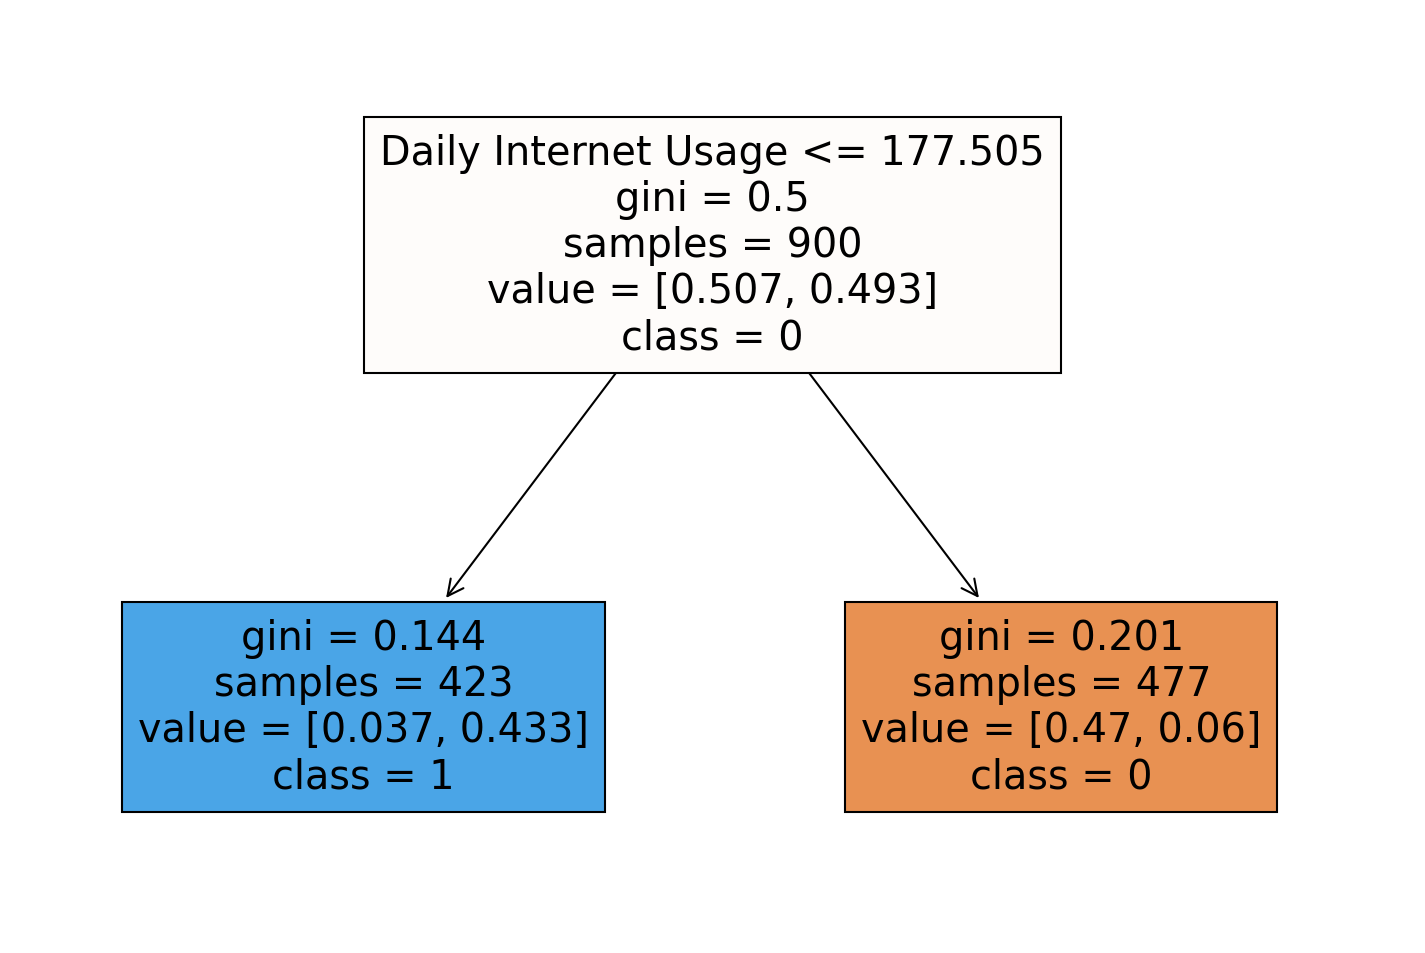

In [21]:
features = list(X.columns)
targets = df["Clicked on Ad"].astype("str")
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model.estimators_[0], filled=True, feature_names=X.columns, class_names=targets.unique());#proportion=True (oran için)